In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import sys
sys.path.append("..")  # if simulator.ipynb is in /notebooks/

import pickle

from simulation.helpers import create_circular_roads
from simulation.core import System
from simulation.controller import TrafficController
from simulation.data_logger import DataLogger
from simulation.spawners import timed_spawner
from simulation.core import Road, Lane, Car


In [31]:
dt = 0.01
sim_time = 100

system = System(dt=dt, final_time=sim_time)

start_pos = (100, 300)
end_pos = (700, 300)
roads = create_circular_roads(10, 1, 200, max_speed=50)

for road in roads:
    system.add_road(road)

logger = DataLogger(tag="basic_one_road_test")
controller = TrafficController(system, logger=logger)

controller.add_spawn_rule(timed_spawner(interval=1.5, road_index=0, num_cars = 10))
controller.add_slow_car(10,5,0)

In [32]:
# Run loop
for _ in range(int(system.final_time / system.dt)):
    controller.control(system.dt)
    system.update(logger=logger)

# Analyze exits
exit_df = logger.to_exit_dataframe()
display(exit_df.head())
print(f"Cars exited: {len(exit_df)}")

adding car with index: 0
adding car with index: 1
adding car with index: 2
adding car with index: 3
adding car with index: 4
adding car with index: 5
adding car with index: 6
adding car with index: 7
adding car with index: 8
adding car with index: 9


""


Cars exited: 0


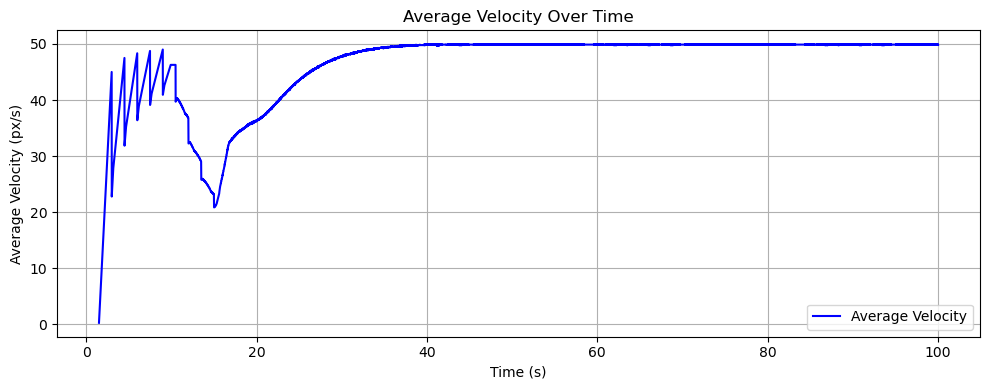

In [33]:
import matplotlib.pyplot as plt

# Get the full log data
df = logger.to_dataframe()

# Group by time and compute average velocity
avg_velocity_by_time = df.groupby("time")["velocity"].mean()

# Plot
plt.figure(figsize=(10, 4))
plt.plot(avg_velocity_by_time.index, avg_velocity_by_time.values, label="Average Velocity", color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Average Velocity (px/s)")
plt.title("Average Velocity Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
